# Chapter 1,2 | Initialization

Load the dataset:

In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt
X_train, y_train, X_test, y_test = utils.load_dataset("./data/")

2023-04-24 22:18:27.501082: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-24 22:18:30.356825: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-24 22:18:30.374239: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 22:18:37.365035: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Ensure dimensions are the right ones.

In [2]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7352, 128, 9)
(7352,)
(2947, 128, 9)
(2947,)


Flattening. 128 * 9 = 1152 features

In [3]:
# shape: (7352, 1152)
X_train_flat = utils.flatten_X(X_train)
# shape: (2947, 1152)
X_test_flat = utils.flatten_X(X_test)

Convert labels to one hot encoding

In [4]:
# shape: (7352, 6)
y_train_one_hot = utils.int_to_one_hot(y_train, n_classes=6)
# shape: (2947, 6)
y_test_one_hot = utils.int_to_one_hot(y_test, n_classes=6)

# Chapter 3

### Counting the total entries of each label on training and test set

We count the number of entries for each class on the training set.

In [5]:
# use unique with return_counts to find the number of occurrences of each class
unique_classes, total_instances = np.unique(y_train, return_counts=True)
# create a dictionary with the combined result
train_class_counts = dict(zip(unique_classes, total_instances))
# print the result
print("Total count for each class of the training set:", train_class_counts)

Total count for each class of the training set: {0: 1226, 1: 1073, 2: 986, 3: 1286, 4: 1374, 5: 1407}


We do the same for the test set.

In [6]:
# use unique with return_counts to find the number of occurrences of each class
unique_classes, total_instances = np.unique(y_test, return_counts=True)
# create a dictionary with the combined result
test_class_counts = dict(zip(unique_classes, total_instances))
# print the result
print("Total count for each class of the test set:", test_class_counts)


Total count for each class of the test set: {0: 496, 1: 471, 2: 420, 3: 491, 4: 532, 5: 537}


### Visualizing the results with histograms

We create the histogram of total entries for each class (Test set). 

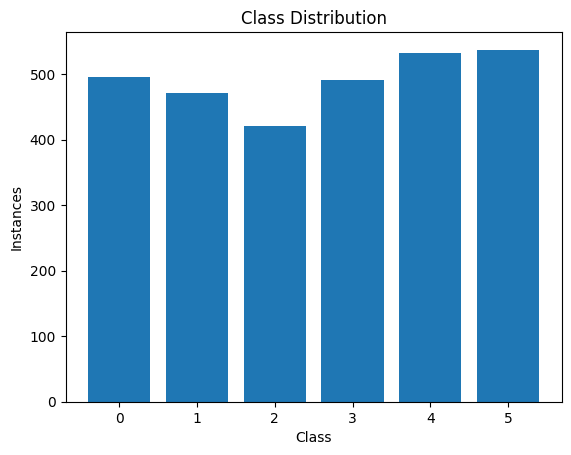

In [7]:
# Create a histogram for the class counts
plt.hist(y_test, bins=np.arange(7) - 0.5, align='mid', rwidth=0.8)
plt.xlabel('Class')
plt.ylabel('Instances')
plt.title('Class Distribution')
plt.show()

We create the histogram of total entries for each class (Training Set). 

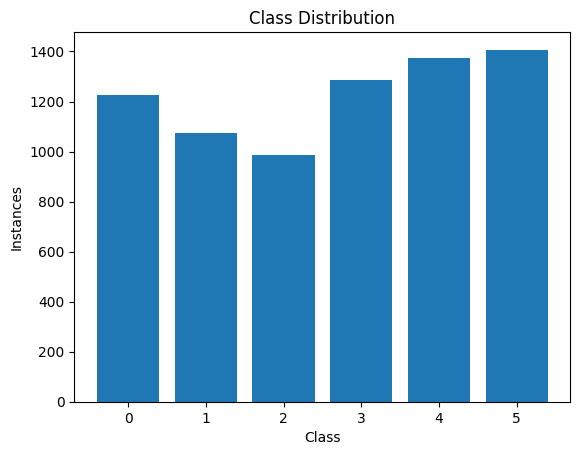

In [8]:
# Create a histogram for the class counts
plt.hist(y_train, bins=np.arange(7) - 0.5, align='mid', rwidth=0.8)
plt.xlabel('Class')
plt.ylabel('Instances')
plt.title('Class Distribution')
plt.show()

By looking at the two histograms, it is certain that both sets share a similar distribution pattern for the total entries in each class.

Regarding the balance of the dataset, we can say that both training and test sets are **moderately balanced**.

The total count for each class of the training set ranges from 986 to 1407 and the total count for each class of the test set ranges from 420 to 537. 

Although there is some variance between class counts, the difference is not significant.

### Calculating metrics for the first characteristic of the dataset

We create a function to calculate mean, median, standard deviation, min and max values for the signals of each label for a given characteristic.

In [9]:
# Calculate indexes of each class
def calculate_statistics(feature_idx=0):
    # Create an array of -1's with the a shape of (7352 samples x 6 classes)
    idx_array = np.full((7352, 6), -1)
    # Fill the array with the indices of the samples for each class
    for c in range(6):
        for i in range(7352):
            if c == y_train[i]:
                idx_array[i, c] = i
    
    # Initialize arrays to store the statistics for each class
    stds = np.empty(6)
    means = np.empty(6)
    medians = np.empty(6)
    maxes = np.empty(6)
    mins = np.empty(6)
    
    # Calculate the statistics for each class
    for c in range(6):
        # Get the samples for the current class and feature
        class_samples = X_train[idx_array[:, c] != -1, :, feature_idx]
        # Calculate the statistics
        medians[c] = np.median(class_samples)
        means[c] = np.mean(class_samples)
        stds[c] = np.std(class_samples)
        maxes[c] = np.max(class_samples)
        mins[c] = np.min(class_samples)

    # Print the results
    print(
        f"WALKING            => | MEAN: {means[0]:.5f}, MEDIAN: {medians[0]:.5f}, STD: {stds[0]:.5f}, MAX: {maxes[0]:.5f}, MIN: {mins[0]:.5f}")
    print(
        f"WALKING_UPSTAIRS   => | MEAN: {means[1]:.5f}, MEDIAN: {medians[1]:.5f}, STD: {stds[1]:.5f}, MAX: {maxes[1]:.5f}, MIN: {mins[1]:.5f}")
    print(
        f"WALKING_DOWNSTAIRS => | MEAN: {means[2]:.5f}, MEDIAN: {medians[2]:.5f}, STD: {stds[2]:.5f}, MAX: {maxes[2]:.5f}, MIN: {mins[2]:.5f}")
    print(
        f"SITTING            => | MEAN: {means[3]:.5f}, MEDIAN: {medians[3]:.5f}, STD: {stds[3]:.5f}, MAX: {maxes[3]:.5f}, MIN: {mins[3]:.5f}")
    print(
        f"STANDING           => | MEAN: {means[4]:.5f}, MEDIAN: {medians[4]:.5f}, STD: {stds[4]:.5f}, MAX: {maxes[4]:.5f}, MIN: {mins[4]:.5f}")
    print(
        f"LAYING             => | MEAN: {means[5]:.5f}, MEDIAN: {medians[5]:.5f}, STD: {stds[5]:.5f}, MAX: {maxes[5]:.5f}, MIN: {mins[5]:.5f}")

    labels = ['WLK', 'WLK-UP', 'WLK-DN', 'SIT', 'STND', 'LNG']

    # Define the colors for each class
    colors = ['r', 'g', 'b', 'c', 'm', 'y']

    # Plot the means
    plt.figure(figsize=(10, 5))
    for i in range(6):
        plt.bar(labels[i], means[i], color=colors[i], alpha=0.7, label=f'{labels[i]}')
    plt.title(f'Mean of Feature {feature_idx} for Each Label')
    plt.xlabel('Labels')
    plt.ylabel('Mean')
    plt.legend()
    plt.show()

We calculate the metrics for the first characteristic (Accelerometer on X-Axis).

WALKING            => | MEAN: 0.99549, MEDIAN: 0.96967, STD: 0.23033, MAX: 2.04533, MIN: -0.23528
WALKING_UPSTAIRS   => | MEAN: 0.94944, MEDIAN: 0.92242, STD: 0.26240, MAX: 2.00213, MIN: 0.09502
WALKING_DOWNSTAIRS => | MEAN: 0.99160, MEDIAN: 0.88959, STD: 0.37779, MAX: 2.19762, MIN: -0.20786
SITTING            => | MEAN: 0.95077, MEDIAN: 0.98922, STD: 0.10454, MAX: 1.19152, MIN: 0.42784
STANDING           => | MEAN: 1.00145, MEDIAN: 1.01016, STD: 0.02535, MAX: 1.22734, MIN: 0.64080
LAYING             => | MEAN: 0.07171, MEDIAN: 0.08354, STD: 0.14127, MAX: 0.47567, MIN: -0.46656


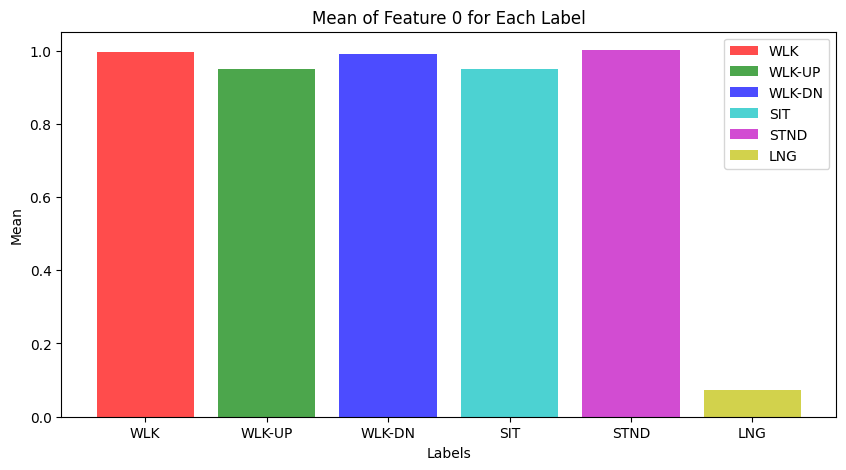

In [10]:
calculate_statistics()

By producing the various metrics and plot the diagram of the mean value, we can clearly see that "Laying" label has a very small mean comparing to the other labels.

Also, regarding the "Laying" label, the standard devation is relatively small and the median value is close to the mean value. This means that the majority of the data points belonging to "Laying" is clustered around the center and there is little variation in the data. Finally, the minimum and maximum value of "Laying" prove that there are no extreme outliers on the data.

**That being said, when we observe a signal belonging to Accelerometer on the X-Axis that its value is close to the mean value of "Laying", we can predict with certainty that it belongs to the "Laying" class.**

### Calculating metrics for the rest of the features

1: 
WALKING            => | MEAN: -0.18154, MEDIAN: -0.15755, STD: 0.18916, MAX: 0.51770, MIN: -1.26412
WALKING_UPSTAIRS   => | MEAN: -0.27349, MEDIAN: -0.26076, STD: 0.19900, MAX: 0.73250, MIN: -1.38773
WALKING_DOWNSTAIRS => | MEAN: -0.14843, MEDIAN: -0.11892, STD: 0.20897, MAX: 0.85248, MIN: -1.58208
SITTING            => | MEAN: 0.14331, MEDIAN: 0.11098, STD: 0.18770, MAX: 0.64084, MIN: -0.34264
STANDING           => | MEAN: -0.16334, MEDIAN: -0.16628, STD: 0.10133, MAX: 0.19973, MIN: -0.49546
LAYING             => | MEAN: 0.64955, MEDIAN: 0.73151, STD: 0.31782, MAX: 1.21735, MIN: -0.58145


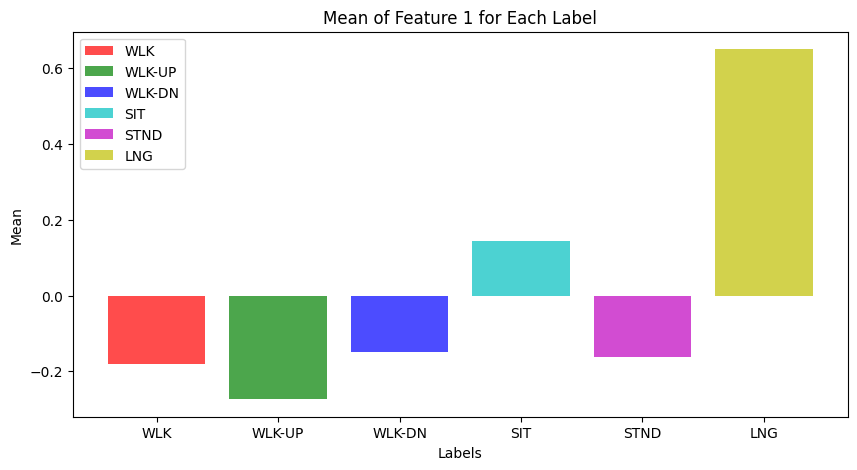

2: 
WALKING            => | MEAN: -0.06950, MEDIAN: -0.05249, STD: 0.21315, MAX: 0.71842, MIN: -1.15721
WALKING_UPSTAIRS   => | MEAN: -0.15528, MEDIAN: -0.14064, STD: 0.25442, MAX: 0.64667, MIN: -1.47218
WALKING_DOWNSTAIRS => | MEAN: -0.05601, MEDIAN: -0.03823, STD: 0.22475, MAX: 0.96327, MIN: -1.63961
SITTING            => | MEAN: 0.15437, MEDIAN: 0.18953, STD: 0.21965, MAX: 0.70266, MIN: -0.49780
STANDING           => | MEAN: -0.03212, MEDIAN: -0.00569, STD: 0.15909, MAX: 0.37603, MIN: -0.48927
LAYING             => | MEAN: 0.56048, MEDIAN: 0.66211, STD: 0.39121, MAX: 1.28136, MIN: -1.02447


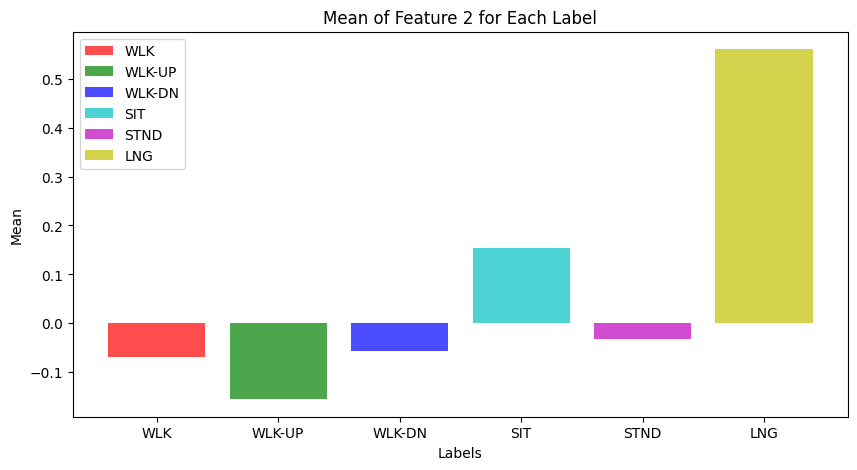

3: 
WALKING            => | MEAN: -0.00027, MEDIAN: -0.02904, STD: 0.22893, MAX: 1.04448, MIN: -1.23224
WALKING_UPSTAIRS   => | MEAN: -0.00322, MEDIAN: -0.03372, STD: 0.25887, MAX: 1.01060, MIN: -0.75241
WALKING_DOWNSTAIRS => | MEAN: 0.00218, MEDIAN: -0.10385, STD: 0.37772, MAX: 1.29991, MIN: -1.18905
SITTING            => | MEAN: -0.00085, MEDIAN: -0.00006, STD: 0.01516, MAX: 0.36730, MIN: -0.35809
STANDING           => | MEAN: 0.00035, MEDIAN: 0.00003, STD: 0.01048, MAX: 0.21992, MIN: -0.35272
LAYING             => | MEAN: -0.00173, MEDIAN: -0.00036, STD: 0.03602, MAX: 0.32773, MIN: -1.03488


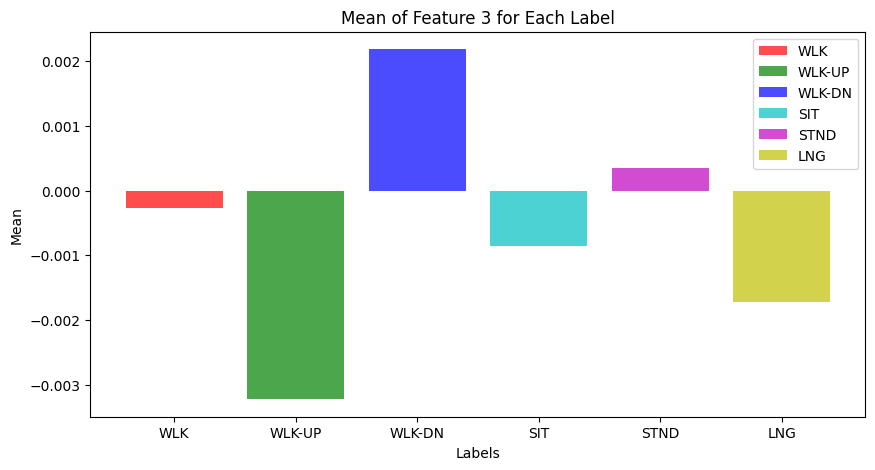

4: 
WALKING            => | MEAN: -0.00033, MEDIAN: 0.02404, STD: 0.17148, MAX: 0.62518, MIN: -0.99819
WALKING_UPSTAIRS   => | MEAN: -0.00499, MEDIAN: 0.00894, STD: 0.17628, MAX: 0.66886, MIN: -1.07321
WALKING_DOWNSTAIRS => | MEAN: 0.00040, MEDIAN: 0.02814, STD: 0.19047, MAX: 0.97598, MIN: -1.34527
SITTING            => | MEAN: 0.00262, MEDIAN: 0.00047, STD: 0.03061, MAX: 0.70804, MIN: -0.34937
STANDING           => | MEAN: 0.00053, MEDIAN: -0.00003, STD: 0.02100, MAX: 0.46153, MIN: -0.31811
LAYING             => | MEAN: -0.00063, MEDIAN: -0.00017, STD: 0.04757, MAX: 0.76646, MIN: -0.96071


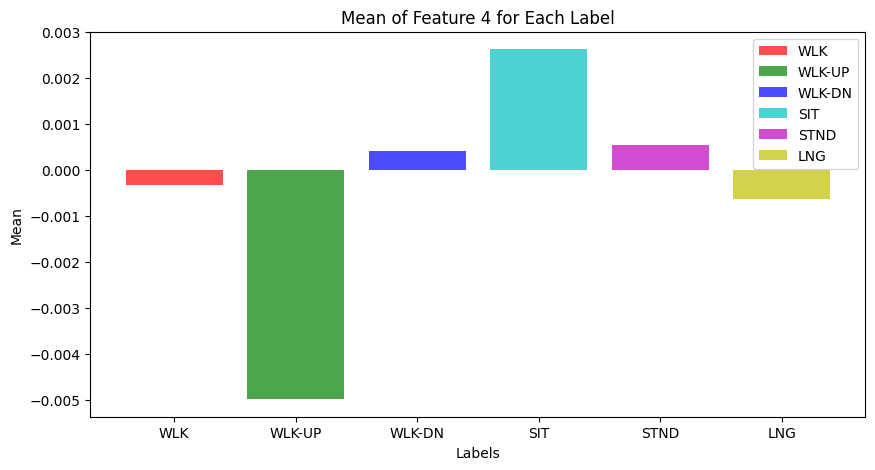

5: 
WALKING            => | MEAN: -0.00019, MEDIAN: 0.00218, STD: 0.14378, MAX: 0.79177, MIN: -0.96292
WALKING_UPSTAIRS   => | MEAN: -0.00400, MEDIAN: -0.01279, STD: 0.16483, MAX: 0.98645, MIN: -0.99836
WALKING_DOWNSTAIRS => | MEAN: 0.00081, MEDIAN: 0.01383, STD: 0.16011, MAX: 1.06692, MIN: -1.36471
SITTING            => | MEAN: 0.00057, MEDIAN: 0.00012, STD: 0.02910, MAX: 0.43885, MIN: -0.60987
STANDING           => | MEAN: 0.00032, MEDIAN: -0.00020, STD: 0.02383, MAX: 0.31533, MIN: -0.60484
LAYING             => | MEAN: 0.00038, MEDIAN: 0.00019, STD: 0.04063, MAX: 0.72255, MIN: -0.69147


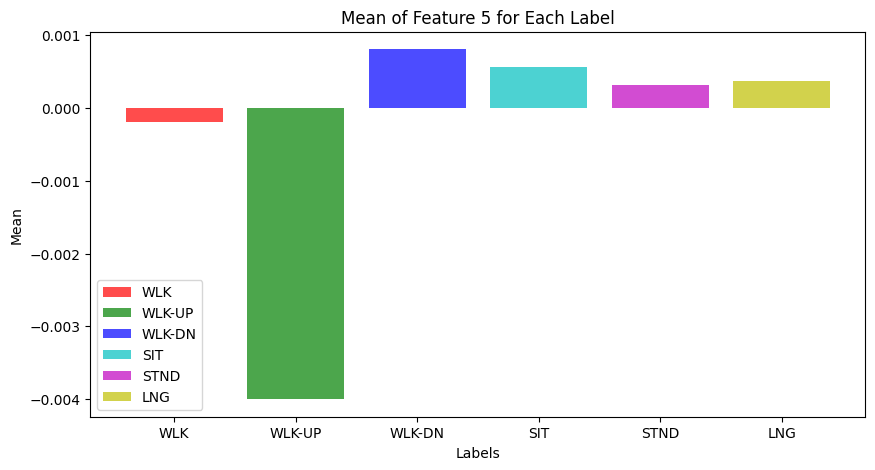

6: 
WALKING            => | MEAN: -0.00369, MEDIAN: 0.00810, STD: 0.50608, MAX: 4.15547, MIN: -3.64471
WALKING_UPSTAIRS   => | MEAN: 0.05012, MEDIAN: 0.01028, STD: 0.58972, MAX: 3.51830, MIN: -2.63668
WALKING_DOWNSTAIRS => | MEAN: -0.05052, MEDIAN: 0.01530, STD: 0.71187, MAX: 3.77952, MIN: -4.73366
SITTING            => | MEAN: -0.01047, MEDIAN: -0.00048, STD: 0.05981, MAX: 1.78773, MIN: -1.14310
STANDING           => | MEAN: 0.00139, MEDIAN: 0.00036, STD: 0.07560, MAX: 1.02388, MIN: -0.97558
LAYING             => | MEAN: 0.01126, MEDIAN: 0.00040, STD: 0.09204, MAX: 2.68397, MIN: -3.53697


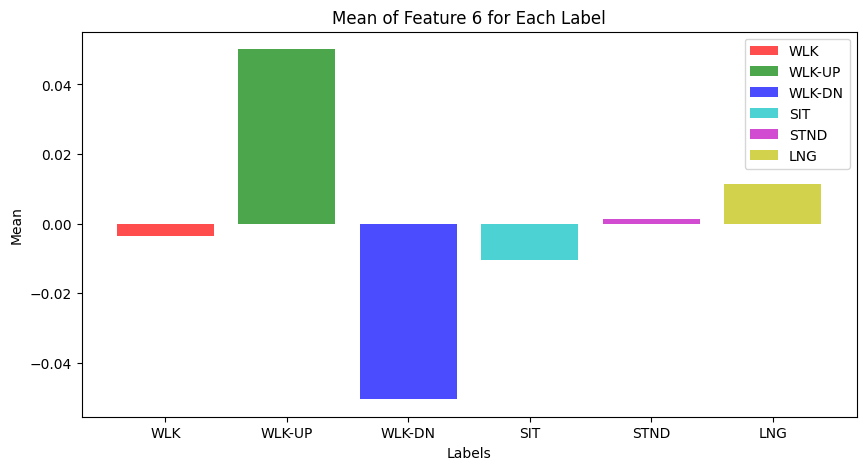

7: 
WALKING            => | MEAN: 0.00137, MEDIAN: -0.02696, STD: 0.55490, MAX: 4.73642, MIN: -4.47793
WALKING_UPSTAIRS   => | MEAN: -0.01021, MEDIAN: -0.04096, STD: 0.57464, MAX: 5.44632, MIN: -3.24727
WALKING_DOWNSTAIRS => | MEAN: 0.00832, MEDIAN: 0.00497, STD: 0.57456, MAX: 5.74606, MIN: -5.97433
SITTING            => | MEAN: 0.00069, MEDIAN: -0.00009, STD: 0.06356, MAX: 1.52577, MIN: -1.12374
STANDING           => | MEAN: 0.00373, MEDIAN: 0.00024, STD: 0.05426, MAX: 1.48060, MIN: -1.36137
LAYING             => | MEAN: -0.00782, MEDIAN: -0.00033, STD: 0.06061, MAX: 1.26450, MIN: -1.37945


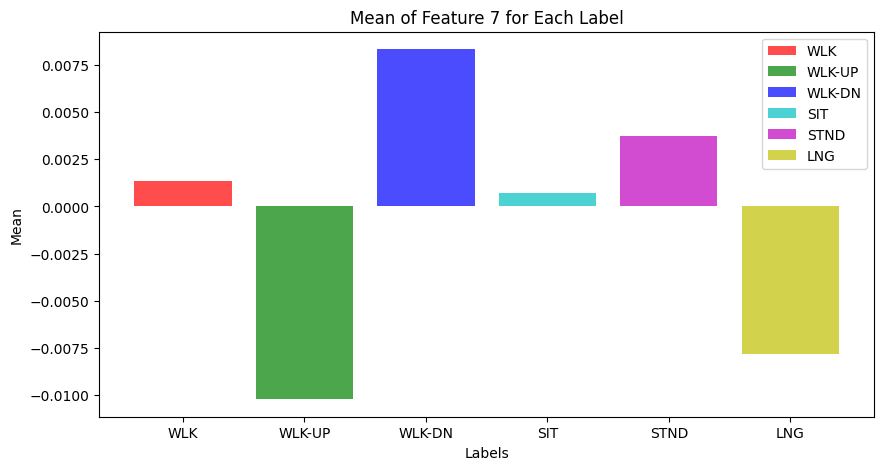

8: 
WALKING            => | MEAN: -0.00095, MEDIAN: 0.02287, STD: 0.34009, MAX: 1.66570, MIN: -1.58974
WALKING_UPSTAIRS   => | MEAN: -0.01647, MEDIAN: 0.01166, STD: 0.41139, MAX: 1.96776, MIN: -2.76301
WALKING_DOWNSTAIRS => | MEAN: 0.00336, MEDIAN: 0.01056, STD: 0.37810, MAX: 2.36598, MIN: -2.08277
SITTING            => | MEAN: -0.00348, MEDIAN: 0.00078, STD: 0.06822, MAX: 0.74913, MIN: -1.27977
STANDING           => | MEAN: -0.00334, MEDIAN: -0.00040, STD: 0.03859, MAX: 0.67047, MIN: -1.32961
LAYING             => | MEAN: 0.01806, MEDIAN: 0.00004, STD: 0.07386, MAX: 0.94697, MIN: -0.75054


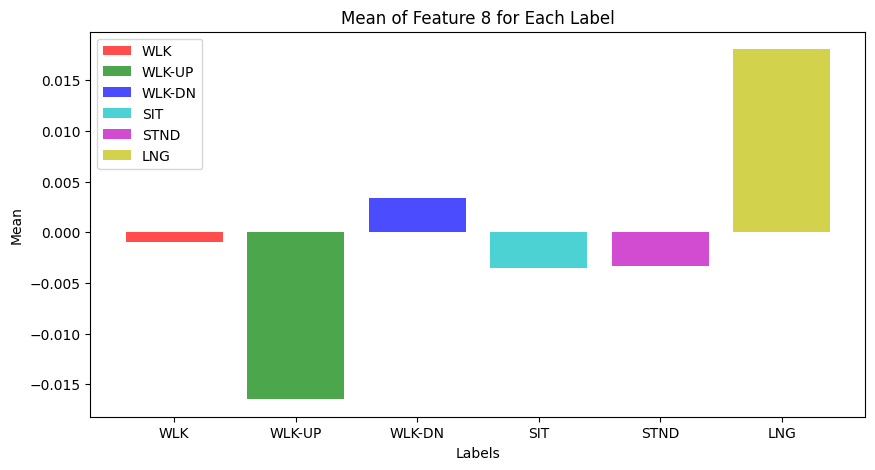

In [11]:
for i in range(1, 9):
    print(f"{i}: ",)
    calculate_statistics(i)

By observing the results and the corresponding histograms, we can comment the following:
* The "Laying" label for the features 1, 2 has very high mean values comparing to the other labels. 
Therefore, by also observing the other metrics of "Laying", we can reach the same conclusions we mentioned previously. 

The next conclusions are about the mean values of certain labels, but for these results, the other metrics (mainly STD, Min, Max) indicates that there are extreme values and thus the data points are not clustered around the center. This means that the mean values here are not so representative.
* For features 4 and 5, the "Walking-Up" label differentiate from the others by having a very high negative mean value.
* For feature 6, the the "Walking-Up" label stands out from the others with a very high positive mean value and in the same time "Walking Down" does the same with its very high negative mean value.
* For feature 8, the "Walking-Up" class has a high negative value and "Laying" a very high positive value.

### Plotting one random signal for each class

For each class, we choose a random signal based on the Feature 0.

The code below ensures that for every run, a random signal for each class will be selected.

We plot the signals altogether.


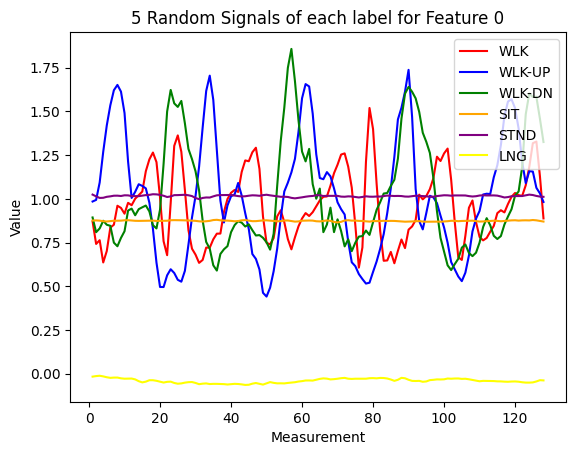

In [12]:
import random
labels = ['WLK', 'WLK-UP', 'WLK-DN', 'SIT', 'STND', 'LNG']

# Create an index array with dimensions (7352, 6) and fill it with -1
idx_array = np.full((7352, 6), -1)

# Loop through each class (0-5) and each sample (0-7351)
for c in range(6):
    for i in range(7352):
        if c == y_train[i]:
            idx_array[i, c] = i

signals = np.empty((6, 128))
for c in range(6):
    class_samples = X_train[idx_array[:, c] != -1, :, 0]
    random_number = random.randint(0, class_samples.shape[0])
    signals[c, :] = class_samples[random_number, :]

# Set the x-axis values as 1 to 128
x = np.arange(1, 129)

# Plot the signals with different colors
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']
for i in range(6):
    plt.plot(x, signals[i], color=colors[i], label=f"{labels[i]}")

# Set the plot title and labels
plt.title("5 Random Signals of each label for Feature 0")
plt.xlabel("Measurement")
plt.ylabel("Value")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


Observing the line plots, we can see that the random signals for "Laying", "Sitting" and "Standing" are all almost parallel to the x-axis in this 0-128 time window. The "Sitting" and "Standing" signals are almost the same (value close to 1.000) and the "Laying" signal is close to 0.001.

As for all the 3 walking labels, they seem to have always a somewhat periodical form. Despite the similar flow they have in the 0-128 time window, there are many points where the values tend to reach the same peak and others where they follow an opposite direction from each other.

# Chapter 4

## Import the necessary packages

In [13]:
from sklearn import linear_model
from sklearn import metrics
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support


## Metrics calculation
We implement a function to calculate the metrics needed for evaluating the models in the current and the next chapters.

This function: 
* calculates the accuracy of the model, 
* produces the confusion matrix
* calculates the f1-score
* calculates the precision and recall metrics for every label and prints the results for the first label only ("Walking").

In [14]:
def calculate_metrics(y_test, y_hat_test):
    acc = metrics.accuracy_score(y_test, y_hat_test)
    cf = metrics.confusion_matrix(y_test, y_hat_test)
    f1 = metrics.f1_score(y_test, y_hat_test, average=None)

    print("Model Accuracy: ", acc)
    print("Confusion Matrix: \n", cf)
    print("F1 Score: ", f1)

    # Calculate precision and recall for each class
    precision, recall, _, _ = precision_recall_fscore_support(
    y_test, y_hat_test)

    #Print results
    print(f"For label \"Walking\", precision is {precision[0]} and recall is {recall[0]}")



## Using scikit-learn to implement a Logistic Regression model

### Logistic regression model architecture

We create a logistic regression model.

* For the solver option we select 'newton-cg', which can handle multinomial loss and converges in fewer iteration than lbfgs (over 1000 iter)
* we use l2 regularization to try and prevent overfitting, which is also supported by newton-cg solver.
* by setting C parameter to 2 (default=1), the model seems to increase its accuracy by 2-3%



In [15]:
# define the hyperparameters to optimize
lr = linear_model.LogisticRegression(penalty='l2', solver='newton-cg', max_iter=100, C=2)
lr.fit(X_train_flat, y_train)


LogisticRegression(C=2, solver='newton-cg')

Evaluate the Logistic Regression model on the test data.

In [16]:
y_pred_labels = lr.predict(X_test_flat)
calculate_metrics(y_test, y_pred_labels)

Model Accuracy:  0.5697319307770614
Confusion Matrix: 
 [[109  77  85  66 159   0]
 [ 71 229  50  40  81   0]
 [ 96  53  93  55 123   0]
 [  0  26   2 370  93   0]
 [  9  86   5  91 341   0]
 [  0   0   0   0   0 537]]
F1 Score:  [0.27912932 0.48619958 0.28396947 0.66486972 0.5131678  1.        ]
For label "Walking", precision is 0.3824561403508772 and recall is 0.21975806451612903


Results info

* We can see the Model Accuracy.

* If the model predicted for a user to walk, the prediction is accurate by ...(see precision for label "Walking")

* If I am currently walking, the model will predict my action with an accuracy of ...(see recall for label "Walking") 


## Using tensorflow to implement a Neural Network with no hidden layers
### Model Architecture

We define a model with one output layer, using the softmax activation function to generate a probability distribution over 6 classes. The input layer has a shape based on the input data (flattened x_train with 1152 total features).

The architecture consists of the following layers:

* An input layer based on the shape of the input data.
* An output layer for our 6 labels using softmax to give a probability distribution.

**Loss Function**

The model is compiled using the categorical_crossentropy loss function, which is good for one-hot encoding labels.

In [17]:
# create the model
model = keras.Sequential([
            layers.Dense(6, input_shape=(
                X_train_flat.shape[1],), activation='softmax'),
        ])

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])
# Train the model
history = model.fit(X_train_flat, y_train_one_hot, epochs=10,
                    batch_size=32, validation_data=(X_test_flat, y_test_one_hot))

Epoch 1/10
230/230 [==============================] - 3s 3ms/step - loss: 1.5634 - accuracy: 0.4280 - val_loss: 1.4231 - val_accuracy: 0.5120
Epoch 2/10
230/230 [==============================] - 0s 2ms/step - loss: 1.3266 - accuracy: 0.5560 - val_loss: 1.3477 - val_accuracy: 0.5205
Epoch 3/10
230/230 [==============================] - 0s 2ms/step - loss: 1.2652 - accuracy: 0.5632 - val_loss: 1.3154 - val_accuracy: 0.5327
Epoch 4/10
230/230 [==============================] - 0s 2ms/step - loss: 1.2303 - accuracy: 0.5668 - val_loss: 1.2955 - val_accuracy: 0.5260
Epoch 5/10
230/230 [==============================] - 0s 2ms/step - loss: 1.2058 - accuracy: 0.5688 - val_loss: 1.2818 - val_accuracy: 0.5317
Epoch 6/10
230/230 [==============================] - 0s 2ms/step - loss: 1.1880 - accuracy: 0.5758 - val_loss: 1.2724 - val_accuracy: 0.5297
Epoch 7/10
230/230 [==============================] - 0s 2ms/step - loss: 1.1736 - accuracy: 0.5811 - val_loss: 1.2651 - val_accuracy: 0.5229
Epoch 

To monitor how the various optimizers and learning rates affect both the training and validation loss and accuracy, we plot the progress of the model for every epoch.

As we see below, the SGD optimizer with learning rate = 0.001 results in a smooth decrease of the loss function for both training and validation data and the same thing happens for the increase of accuracy.

The plot also shows that it does not overfit to the training data.

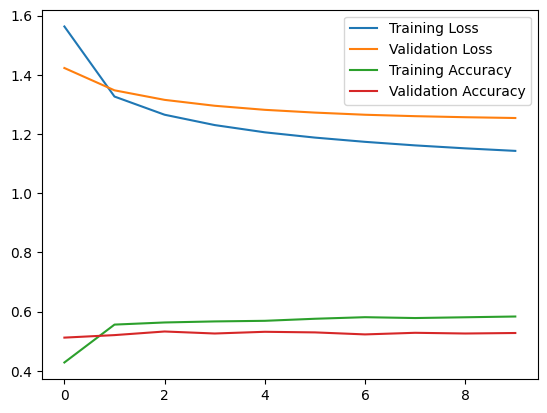

In [18]:

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

For the final evaluation:

In [19]:
y_pred = model.predict(X_test_flat)
y_pred_labels = utils.one_hot_to_int(y_pred)

calculate_metrics(y_test, y_pred_labels)

93/93 [==============================] - 0s 1ms/step
Model Accuracy:  0.5276552426196132
Confusion Matrix: 
 [[115  70  37  85 189   0]
 [106 170  58  28 109   0]
 [ 92  49  76  56 147   0]
 [  2   0   0 369 120   0]
 [ 35  48   2 116 331   0]
 [  1  42   0   0   0 494]]
F1 Score:  [0.27154664 0.4        0.25632378 0.64454148 0.46358543 0.95829292]
For label "Walking", precision is 0.32763532763532766 and recall is 0.2318548387096774


Results info

* We can see the Model Accuracy.

* If the model predicted for a user to walk, the prediction is accurate by ...(see precision for label "Walking")

* If I am currently walking, the model will predict my action with an accuracy of ...(see recall for label "Walking") 


# **Chapter 5**
## Implementing a Fully Connected Neural Network for the given dataset.

## Model architecture
**We define a function to build a FC model that allows experimenting with its parameters.**

The function supports the option of passing values for the number of hidden layers and the number of neurons in each hidden layer.

We use the l2 regularization for the dense layers to help prevent 
overfitting of the model to the training data.

The hidden layers use the ReLU activation to prevent the vanishing gradient problem.

The architecture consists of the following layers:

1. An input layer based on the shape of the input data (flattened x_train with 1152 total features).
2. The option to add a specified number of hidden layers with a specified number of neurons in each layer.
3. An output layer for our 6 labels using softmax to give a probability distribution.

**Optimizers and Loss Function**

* We provide the option to choose between two optimizers (Adam or SGD) and specify the learning rate.
* The model is compiled using the categorical_crossentropy loss function, which is good for one-hot encoding labels.

The model is trained based on specified epochs and batch size and evaluated on the test set.

In [20]:
def fc_model(n_hidden_layers, n_neurons, epochs, batch_size, optimizer, lr):
    # Create a sequential model
    model = keras.Sequential()
    
    # Add the first dense layer with ReLU activation and L2 regularization
    model.add(layers.Dense(n_neurons, input_shape=(
        X_train_flat.shape[1],), activation='relu', kernel_regularizer=l2(0.01)))
    
    # Add additional hidden layers with ReLU activation and L2 regularization
    for i in range(n_hidden_layers-1):
        model.add(layers.Dense(n_neurons, activation="relu",
                  kernel_regularizer=l2(0.01)))
    
    # Add the output layer with softmax activation
    model.add(layers.Dense(6, activation="softmax"))
    
    # Set the optimizer and compile the model
    if optimizer == 'Adam':
        optimizer = keras.optimizers.Adam(learning_rate=lr)
    elif optimizer == 'SGD':
        optimizer = keras.optimizers.SGD(learning_rate=lr)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer, metrics=['accuracy'])

    # Train the model on the training set
    model.fit(X_train_flat, y_train_one_hot, epochs=epochs,
              batch_size=batch_size, validation_data=(X_test_flat, y_test_one_hot))
    
    # Evaluate the model on the test set
    _, accuracy = model.evaluate(X_test_flat, y_test_one_hot, verbose=0)
    
    # Make predictions on the test set and convert to integer labels
    y_pred = model.predict(X_test_flat)
    y_pred_labels = utils.one_hot_to_int(y_pred)

    # Return the accuracy and predicted labels
    return accuracy, y_pred_labels

###  Optimized model structure and evaluation
We feed the model function with the the best parameters we found after experimenting and produce the complete info of the model evaluation.

For the experimenting process read the "Experimenting" section below.

In [21]:
NUMBER_OF_H_LAYERS = 3
N_NEURONS = 64
EPOCHS = 10
BATCH_SIZE = 16
OPTIMIZER = "Adam"
LEARNING_RATE = 0.001
accuracy, y_pred_labels = fc_model(
    NUMBER_OF_H_LAYERS, N_NEURONS, EPOCHS, BATCH_SIZE, OPTIMIZER, LEARNING_RATE)

Epoch 1/10
460/460 [==============================] - 2s 3ms/step - loss: 1.5081 - accuracy: 0.7587 - val_loss: 1.0646 - val_accuracy: 0.7771
Epoch 2/10
460/460 [==============================] - 1s 3ms/step - loss: 0.8199 - accuracy: 0.8588 - val_loss: 0.9761 - val_accuracy: 0.7737
Epoch 3/10
460/460 [==============================] - 1s 3ms/step - loss: 0.6822 - accuracy: 0.8851 - val_loss: 0.8031 - val_accuracy: 0.8314
Epoch 4/10
460/460 [==============================] - 2s 3ms/step - loss: 0.6170 - accuracy: 0.8970 - val_loss: 0.7589 - val_accuracy: 0.8405
Epoch 5/10
460/460 [==============================] - 1s 3ms/step - loss: 0.5649 - accuracy: 0.9057 - val_loss: 0.7934 - val_accuracy: 0.8286
Epoch 6/10
460/460 [==============================] - 1s 3ms/step - loss: 0.5268 - accuracy: 0.9090 - val_loss: 0.7034 - val_accuracy: 0.8429
Epoch 7/10
460/460 [==============================] - 1s 3ms/step - loss: 0.5116 - accuracy: 0.9144 - val_loss: 0.6393 - val_accuracy: 0.8711
Epoch 

Print the model evaluation info

In [22]:
# Print the results
calculate_metrics(y_test, y_pred_labels)

Model Accuracy:  0.8588394977943672
Confusion Matrix: 
 [[430   7  45   7   7   0]
 [ 29 319 109   0  14   0]
 [  2   3 401   1  13   0]
 [  0   1   0 371 115   4]
 [  0   0   2  57 473   0]
 [  0   0   0   0   0 537]]
F1 Score:  [0.89864159 0.79650437 0.82088025 0.8004315  0.81975737 0.99628942]
For label "Walking", precision is 0.9327548806941431 and recall is 0.8669354838709677


Results info

* We can see the Model Accuracy.

* If the model predicted for a user to walk, the prediction is accurate by ...(see precision for label "Walking")

* If I am currently walking, the model will predict my action with an accuracy of ...(see recall for label "Walking") 


### Experimenting

In this section we will train the model for different values of hidden layers and number of neurons.

We will try the combinations for certain numbers of hidden layers and number of neurons.

For this part we use **adam** optimizer and learning rate of **0.0001**

The specified number of batch size(**16**) and epochs(**10**) is chosen empirically based on monitoring the values of accuracy and loss for both the training and validation set after multiple runs and spotting the point where loss function slows down on decreasing for the valdiation set and the accuracy on increasing.

In [23]:
# Define the range of hidden layers and neurons to try
N_HIDDEN_LAYERS = [1, 3, 5]
N_NEURONS = [16, 32, 64]
EPOCHS = 10
BATCH_SIZE = 16
LEARNING_RATE = 0.0001
OPTIMIZER = "Adam"
results = []

for h_layers_number in N_HIDDEN_LAYERS:
    for neurons_number in N_NEURONS:
        print("--------------------------------------------------")
        print("Number of hidden layers:", h_layers_number,
              ", Number of neurons:", neurons_number)
        accuracy, _ = fc_model(
            h_layers_number, neurons_number, EPOCHS, BATCH_SIZE, OPTIMIZER, LEARNING_RATE)
        results.append(
            (h_layers_number, neurons_number, accuracy))


--------------------------------------------------
Number of hidden layers: 1 , Number of neurons: 16
Epoch 1/10
460/460 [==============================] - 2s 3ms/step - loss: 1.5738 - accuracy: 0.5589 - val_loss: 1.4641 - val_accuracy: 0.5551
Epoch 2/10
460/460 [==============================] - 1s 2ms/step - loss: 1.2690 - accuracy: 0.6306 - val_loss: 1.3495 - val_accuracy: 0.5962
Epoch 3/10
460/460 [==============================] - 1s 2ms/step - loss: 1.1339 - accuracy: 0.6946 - val_loss: 1.2735 - val_accuracy: 0.6396
Epoch 4/10
460/460 [==============================] - 1s 2ms/step - loss: 1.0312 - accuracy: 0.7414 - val_loss: 1.2072 - val_accuracy: 0.6983
Epoch 5/10
460/460 [==============================] - 1s 2ms/step - loss: 0.9488 - accuracy: 0.7765 - val_loss: 1.1533 - val_accuracy: 0.7177
Epoch 6/10
460/460 [==============================] - 1s 2ms/step - loss: 0.8818 - accuracy: 0.8040 - val_loss: 1.1082 - val_accuracy: 0.7099
Epoch 7/10
460/460 [==========================

Print the accuracies for each combination.

In [25]:
# Print the results in a nice format
print("--------------------------------------------------")
print("Results:")
print("Hidden Layers\tNeurons\t\tAccuracy")
for result in results:
    print("{}\t\t{}\t\t{}".format(
        result[0], result[1], result[2]))


--------------------------------------------------
Results:
Hidden Layers	Neurons		Accuracy
1		16		0.7784187197685242
1		32		0.8364438414573669
1		64		0.857821524143219
3		16		0.6844248175621033
3		32		0.8109942078590393
3		64		0.8364438414573669
5		16		0.7573803663253784
5		32		0.8157448172569275
5		64		0.8225314021110535


By looking the results, we observe that the number of neurons has the biggest effect to the model accuracy. Specifically, 64 neurons for each hidden layer seems to help the model make better predictions.

For that reason, we choose to keep the combination of 64 neurons and 3 hidden layers.

#### Experimenting over various optimizer and learning rates

Now we experiment with different combinations of optimizers and learning rates to determine which yields the best accuracy. Specifically, we will evaluate the model using SGD and Adam optimizers with learning rates of 0.01, 0.001, and 0.0001.

In [26]:
learning_rates = [0.01, 0.001, 0.0001]
optimizers = ['Adam', 'SGD']
results = []
for optimizer in optimizers:
    for learning_rate in learning_rates:
        print("--------------------------------------------------") 
        print("Learning rate:", learning_rate, "Optimizer:", optimizer)   
        accuracy, _ = fc_model(3, 64, 10, 16, optimizer, learning_rate)
        results.append((learning_rate,optimizer, accuracy))


--------------------------------------------------
Learning rate: 0.01 Optimizer: Adam
Epoch 1/10
460/460 [==============================] - 2s 3ms/step - loss: 1.4168 - accuracy: 0.5174 - val_loss: 1.3878 - val_accuracy: 0.5022
Epoch 2/10
460/460 [==============================] - 1s 3ms/step - loss: 1.2492 - accuracy: 0.5375 - val_loss: 1.3968 - val_accuracy: 0.5070
Epoch 3/10
460/460 [==============================] - 1s 3ms/step - loss: 1.2082 - accuracy: 0.5808 - val_loss: 1.4987 - val_accuracy: 0.4842
Epoch 4/10
460/460 [==============================] - 1s 3ms/step - loss: 1.1199 - accuracy: 0.6012 - val_loss: 1.3801 - val_accuracy: 0.5300
Epoch 5/10
460/460 [==============================] - 1s 3ms/step - loss: 1.0734 - accuracy: 0.6314 - val_loss: 1.1078 - val_accuracy: 0.6013
Epoch 6/10
460/460 [==============================] - 1s 3ms/step - loss: 1.1210 - accuracy: 0.6273 - val_loss: 1.2106 - val_accuracy: 0.5952
Epoch 7/10
460/460 [==============================] - 1s 3ms/

Print the accuracies for each combination of optimizers and learning rate values.

In [27]:
# Print the results in a nice format
print("Results:")
print("--------")
print("Lr.\tOptim.\tAcc.")
for result in results:
    print("{}\t{}\t{}".format(result[0], result[1], result[2]))

Results:
--------
Lr.	Optim.	Acc.
0.01	Adam	0.6274176836013794
0.001	Adam	0.8361045122146606
0.0001	Adam	0.8595181703567505
0.01	SGD	0.8479809761047363
0.001	SGD	0.6396335363388062
0.0001	SGD	0.4326433539390564


After multiple and manual runs, the results show that **Adam** with learning rate of value **0.001** or **0.0001** yield the best accuracy. SGD with learning rate of value 0.01 achieves also high accuracy that is close to the other results.

As we saw, we selected Adam and learning rate = 0.001 for the final model structure.

# **Chapter 6**
## Implementing a CNN Model for the given dataset.

### Importing Necessary Libraries

In [28]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

### Model architecture
**We define a function to build a CNN model that allows experimenting with its parameters.**

The function supports the option of passing values for the number of filters, the kernel size and the number of the intermediate convolution layers.

The hidden layers use the ReLU activation to prevent the vanishing gradient problem.

The architecture consists of the following layers:

1. An input convolutional layer based on the shape of the input data (128 time steps, 9 features).
2. The option to add a specified number of intermediate Conv1D layers to enable the model to learn more complex patterns in the data.
3. A MaxPooling1D layer of size 2 that reduces the spatial size of the feature maps by half while retaining the important features.
3. A Dropout layer to prevent overfitting (does not seem to have huge impact).
4. A Flatten layer to prepare the output for the fully connected layers in the final stage.
5. A hidden layer with 128 neurons and an output layer for our 6 labels using softmax to give a probability distribution.

**Optimizers and Loss Function**

* We provide the option to choose between two optimizers (Adam or SGD) and specify the learning rate.
* The model is compiled using the categorical_crossentropy loss function, which is good for one-hot encoding labels.

The model is trained based on specified epochs and batch size and evaluated on the test set.

In [29]:
def cnn_model(filter_size, kernel_size, n_cnv_layers, epochs, batch_size, optimizer, lr):

    # Build the CNN model with the given parameters
    model = keras.Sequential()
    model.add(Conv1D(filters=filter_size, kernel_size=kernel_size,
              activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    for i in range(n_cnv_layers-1):
        model.add(Conv1D(filters=filter_size,
                  kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(6, activation='softmax'))

    # Set the optimizer and compile the model
    if optimizer == 'Adam':
        optimizer = keras.optimizers.Adam(learning_rate=lr)
    elif optimizer == 'SGD':
        optimizer = keras.optimizers.SGD(learning_rate=lr)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer, metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train_one_hot, epochs=epochs,
              batch_size=batch_size, validation_data=(X_test, y_test_one_hot))
    # Evaluate on the test set
    _, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)
    
    y_pred = model.predict(X_test)
    y_pred_labels = utils.one_hot_to_int(y_pred)

    return accuracy, y_pred_labels

###  Optimized model structure and evaluation
We feed the model function with the the best parameters we found after experimenting and produce the complete info of the model evaluation.

For the experimenting process read the "Experimenting" section below.

In [30]:
NUMBER_OF_FILTERS = 128
KERNEL_SIZE = 5
NUMBER_OF_CONV_LAYERS = 5
EPOCHS = 7
BATCH_SIZE = 32
OPTIMIZER = "Adam"
LEARNING_RATE = 0.001    
accuracy, y_pred_labels = cnn_model(NUMBER_OF_FILTERS, KERNEL_SIZE, NUMBER_OF_CONV_LAYERS, EPOCHS, BATCH_SIZE, OPTIMIZER, LEARNING_RATE)

calculate_metrics(y_test, y_pred_labels)

Epoch 1/7
230/230 [==============================] - 21s 83ms/step - loss: 0.3851 - accuracy: 0.8417 - val_loss: 0.6547 - val_accuracy: 0.8683
Epoch 2/7
230/230 [==============================] - 19s 81ms/step - loss: 0.1504 - accuracy: 0.9414 - val_loss: 0.4714 - val_accuracy: 0.9155
Epoch 3/7
230/230 [==============================] - 22s 94ms/step - loss: 0.2295 - accuracy: 0.9334 - val_loss: 0.3376 - val_accuracy: 0.9169
Epoch 4/7
230/230 [==============================] - 21s 89ms/step - loss: 0.1119 - accuracy: 0.9533 - val_loss: 0.5594 - val_accuracy: 0.8653
Epoch 5/7
230/230 [==============================] - 20s 89ms/step - loss: 0.2444 - accuracy: 0.9412 - val_loss: 0.6675 - val_accuracy: 0.9040
Epoch 6/7
230/230 [==============================] - 20s 89ms/step - loss: 0.1121 - accuracy: 0.9554 - val_loss: 1.0627 - val_accuracy: 0.9196
Epoch 7/7
93/93 [==============================] - 2s 22ms/step
Model Accuracy:  0.9104173736002714
Confusion Matrix: 
 [[482  14   0   0   0 

Results info

* We can see the Model Accuracy.

* If the model predicted for a user to walk, the prediction is accurate by ...(see precision for label "Walking")

* If I am currently walking, the model will predict my action with an accuracy of ...(see recall for label "Walking") 


### Experimenting

In this section we will train the model for different values of filters, kernel size and number of conv layers and compare them to find the best one.
To reduce the training process time we will not try every possible combination of the following arrays but instead we will run 3 iterations and add more complexity every time.

**1st iteration: Kernel size = 3, Number of intermediate conv. layers = 1, Filter size = 16**

**2nd iteration: Kernel size = 5, Number of intermediate conv. layers = 3, Filter size = 64**

**3rd iteration: Kernel size = 7, Number of intermediate conv. layers = 5, Filter size = 128**

For this part we are using **adam** optimizer and learning rate of **0.0001**

The specified number of batch size(**32**) and epochs(**7**) is chosen empirically based on monitoring the values of accuracy and loss for both the training and validation set after multiple runs and spotting the point where loss function does not decreases further for the valdiation set or the accuracy increases.




In [33]:
# Define the different kernel sizes and number of conv layers to try
kernel_sizes = [3, 5, 7]
n_conv_layers = [1, 3, 5]
filters_size = [16, 64, 128]
EPOCHS = 7
BATCH_SIZE = 32
LEARNING_RATE = 0.0001
OPTIMIZER = "Adam"
results = []

for i in range(3):
    print("--------------------------------------------------")
    print("Number of filters:", filters_size[i], ", Kernel size:", kernel_sizes[i],
          ", Number of hidden convolution layers:", n_conv_layers[i])
    accuracy, _ = cnn_model(
        filters_size[i], kernel_sizes[i], n_conv_layers[i], EPOCHS, BATCH_SIZE, OPTIMIZER, LEARNING_RATE)
    results.append(
        (filters_size[i], kernel_sizes[i], n_conv_layers[i], accuracy))

--------------------------------------------------
Number of filters: 16 , Kernel size: 3 , Number of hidden convolution layers: 1
Epoch 1/7
230/230 [==============================] - 2s 6ms/step - loss: 1.1955 - accuracy: 0.5518 - val_loss: 0.9193 - val_accuracy: 0.6427
Epoch 2/7
230/230 [==============================] - 1s 5ms/step - loss: 0.7327 - accuracy: 0.7062 - val_loss: 0.7520 - val_accuracy: 0.7044
Epoch 3/7
230/230 [==============================] - 1s 5ms/step - loss: 0.5799 - accuracy: 0.7613 - val_loss: 0.6662 - val_accuracy: 0.7553
Epoch 4/7
230/230 [==============================] - 1s 5ms/step - loss: 0.4896 - accuracy: 0.8101 - val_loss: 0.6329 - val_accuracy: 0.7757
Epoch 5/7
230/230 [==============================] - 1s 5ms/step - loss: 0.4315 - accuracy: 0.8342 - val_loss: 0.6080 - val_accuracy: 0.7849
Epoch 6/7
230/230 [==============================] - 1s 5ms/step - loss: 0.3908 - accuracy: 0.8549 - val_loss: 0.5892 - val_accuracy: 0.8052
Epoch 7/7
93/93 [======

Print the accuracies for each combination.

In [34]:
# Print the results in a nice format
print("--------------------------------------------------")
print("Results:")
print("Fil-size\tK-Size\t\tCnv-Layers\tAccuracy")
for result in results:
    print("{}\t\t{}\t\t{}\t{}".format(
        result[0], result[1], result[2], result[3]))


--------------------------------------------------
Results:
Fil-size	K-Size		Cnv-Layers	Accuracy
16		3		1	0.8157448172569275
64		5		3	0.9100780487060547
128		7		5	0.9161859750747681


After numerous manual runs, the results show that combinations **(64, 5, 3)** and **(128, 7, 3)** yield the best accuracy scores. Based on these results, we decide to keep the combination (7,3,128) for the final structure.

#### Experimenting over various optimizer and learning rates

Now we experiment with different combinations of optimizers and learning rates to determine which yields the best accuracy. Specifically, we will evaluate the model using SGD and Adam optimizers with learning rates of 0.01, 0.001, and 0.0001.

We tried the experiment for epochs = 7 as before, but for faster training speed and demonstration purposes we use 1 epoch.

In [35]:
learning_rates = [0.01, 0.001, 0.0001]
optimizers = ['Adam', 'SGD']
results = []
for optimizer in optimizers:
    for learning_rate in learning_rates:
        print("--------------------------------------------------") 
        print("Learning rate:", learning_rate, "Optimizer:", optimizer)   
        accuracy, _ = cnn_model(128, 7, 5, 1, 32, optimizer, learning_rate)
        results.append((learning_rate,optimizer, accuracy))


--------------------------------------------------
Learning rate: 0.01 Optimizer: Adam
93/93 [==============================] - 3s 28ms/step
--------------------------------------------------
Learning rate: 0.001 Optimizer: Adam
93/93 [==============================] - 3s 29ms/step
--------------------------------------------------
Learning rate: 0.0001 Optimizer: Adam
93/93 [==============================] - 3s 28ms/step
--------------------------------------------------
Learning rate: 0.01 Optimizer: SGD
93/93 [==============================] - 3s 28ms/step
--------------------------------------------------
Learning rate: 0.001 Optimizer: SGD
93/93 [==============================] - 3s 28ms/step
--------------------------------------------------
Learning rate: 0.0001 Optimizer: SGD
93/93 [==============================] - 3s 35ms/step


Print the accuracies for each combination of optimizers and learning rate values

In [36]:
# Print the results in a nice format
print("Results:")
print("--------")
print("Lr.\tOptim.\tAcc.")
for result in results:
    print("{}\t{}\t{}".format(result[0], result[1], result[2]))

Results:
--------
Lr.	Optim.	Acc.
0.01	Adam	0.8215134143829346
0.001	Adam	0.9056667685508728
0.0001	Adam	0.8673226833343506
0.01	SGD	0.5710892677307129
0.001	SGD	0.464200884103775
0.0001	SGD	0.27078384160995483


After multiple and manual runs, the results show that **Adam** and learning rate of value **0.001** yield the best accuracy.

# Chapter 7
## Implementing a Random Forest Classifier for the given dataset.

Importing the necessary packages.

In [37]:
from sklearn.ensemble import RandomForestClassifier

### Model architecture
**We define a function to build a Random Forest model that allows experimenting with its parameters.**

The function supports the option of passing values for the maximum depth of the trees and the number of trees in the forest.

The architecture consists of the following steps:

1. A Random Forest classifier with the specified maximum depth and number of trees is created.
2. The model is trained using the flattened training data and the one-hot encoded labels.
3. The model predicts the labels of the test data.


In [38]:
def random_forest(max_depth, n_estimators):
    # Create a random forest classifier with the current max depth and number of estimators
    rfc = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)

    # Train the model
    rfc.fit(X_train_flat, y_train_one_hot)
    
    y_pred = rfc.predict(X_test_flat)
    y_pred_labels = utils.one_hot_to_int(y_pred)

    acc = metrics.accuracy_score(y_test, y_pred_labels)
    return acc, y_pred_labels


### Experimenting

We experiment over various values for max depth and number of estimators and observe how that affacts the accuracy.

In [39]:
max_depth_values = [10, 20, 30]
n_estimators_values = [50, 100, 150]

results = []

for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        accuracy, _ = random_forest(max_depth, n_estimators)
        results.append((max_depth, n_estimators, accuracy))

print("Results:")
print("--------")
print("Max Depth\tN Estimators\tAccuracy")
for result in results:
    print("{}\t\t{}\t\t{:.4f}".format(result[0], result[1], result[2]))

Results:
--------
Max Depth	N Estimators	Accuracy
10		50		0.7822
10		100		0.7937
10		150		0.7913
20		50		0.7964
20		100		0.7981
20		150		0.7981
30		50		0.7930
30		100		0.7998
30		150		0.7981


The results show that the accuracy values for the different combinations are very close to each other and have a value near **~80%**.

###  Final model evaluation

Given the fact that for different parameters for max depth and number of estimators, the random forest classifier yield same values of accuracy, we could select any of the previous combinations. 

For the final evaluation we select:
* MAX DEPTH = 20
* NUMBER OF ESTIMATORS = 150

In [40]:
MAX_DEPTH = 20
N_ESTIMATORS = 150
_, y_pred_labels = random_forest(MAX_DEPTH, N_ESTIMATORS)

calculate_metrics(y_test, y_pred_labels)

Model Accuracy:  0.7994570749915167
Confusion Matrix: 
 [[488   4   4   0   0   0]
 [180 291   0   0   0   0]
 [145   3 272   0   0   0]
 [ 37   6   0 376  72   0]
 [ 25   2   0 113 392   0]
 [  0   0   0   0   0 537]]
F1 Score:  [0.71188913 0.74903475 0.7816092  0.76734694 0.78714859 1.        ]
For label "Walking", precision is 0.5577142857142857 and recall is 0.9838709677419355


Results info

* We can see the Model Accuracy.

* If the model predicted for a user to walk, the prediction is accurate by ...(see precision for label "Walking")

* If I am currently walking, the model will predict my action with an accuracy of ...(see recall for label "Walking") 
